In [1]:
import torch

1.1.2 PyTorch张量

In [2]:
#普通python变量
x = 3.5
y = x*x + 2
print(x,y)

3.5 14.25


In [3]:
#简单的pytorch张量
x = torch.tensor(3.5)
print(x)

tensor(3.5000)


In [4]:
#简单的张量计算
y = x + 3
print(y)

tensor(6.5000)


1.1.2 PyTorch的自动求导机制

In [5]:
#pytorch张量
x = torch.tensor(3.5,requires_grad=True)
print(x)

tensor(3.5000, requires_grad=True)


In [6]:
#y已x的函数表示
y = (x-1) * (x-2) * (x-3)
print(y)

tensor(1.8750, grad_fn=<MulBackward0>)


In [7]:
#计算梯度
y.backward()

In [8]:
#x = 3.5 时的梯度
x.grad

tensor(5.7500)

1.1.4计算图

In [9]:
#创建包含x,y和z的计算图
x = torch.tensor(3.5,requires_grad=True)
y = x * x
z = 2 * y + 3

In [10]:
#计算梯度
z.backward()

In [11]:
#当 x=3.5时的梯度
x.grad

tensor(14.)

In [12]:
#创建包含x,y和z的计算图
a = torch.tensor(2.0,requires_grad=True)
b = torch.tensor(1.0,requires_grad=True)
x = 2*a + 3*b
y = 5*a*a + 3*b*b*b
z = 2*x + 3*y

In [13]:
#计算梯度
z.backward()


In [14]:
#当a = 2时的梯度
a.grad

tensor(64.)

## 1.2 初试pytorch神经网络

### 1.2.1 mnist图像数据集

In [15]:
#导入pandas库读取csv文件
import pandas

In [16]:
#导入matplotlib用于绘图
import matplotlib.pyplot as plt

In [17]:
df = pandas.read_csv("/home/gree/wfDocument/gree/wfDocument/其他/练习项目/PythonItem/ML/mnist_train.csv",header=None)

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


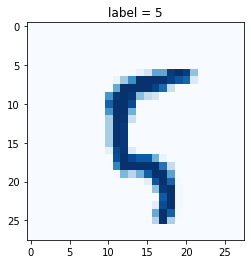

In [21]:
#从DataFrame读取数据
row = 100
data = df.iloc[row]

#第一个值是标签
label = data[0]

#图像是余下的784个值
img = data[1:].values.reshape(28,28)
plt.title("label = " + str(label))
plt.imshow(img,interpolation='none',cmap="Blues")
plt.show()

### 1.2.4 简单的神经网络